<a href="https://colab.research.google.com/github/tejaswini-a08/LangChain/blob/main/BrightFuture_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Database Setup

In [37]:
    %pip install ipython-sql

In [38]:
    %load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [42]:
# Reconnect fresh
import sqlite3

conn = sqlite3.connect("ngo_database.db")
cursor = conn.cursor()


In [44]:
# Clear old data (to avoid IntegrityError on re-runs)
cursor.execute("DELETE FROM Beneficiaries;")
cursor.execute("DELETE FROM Projects;")
cursor.execute("DELETE FROM Employees;")
cursor.execute("DELETE FROM Departments;")
conn.commit()


In [57]:
import sqlite3

# Connect to database (stored in Colab VM for now)
conn = sqlite3.connect("ngo_database.db")
cursor = conn.cursor()

# --- Step 1: Drop old tables if they exist ---
cursor.execute("DROP TABLE IF EXISTS Beneficiaries;")
cursor.execute("DROP TABLE IF EXISTS Projects;")
cursor.execute("DROP TABLE IF EXISTS Employees;")
cursor.execute("DROP TABLE IF EXISTS Departments;")

# --- Step 2: Create fresh tables ---
cursor.execute("""
CREATE TABLE Departments (
    DepartmentID INTEGER PRIMARY KEY,
    DepartmentName TEXT NOT NULL
);
""")

cursor.execute("""
CREATE TABLE Employees (
    EmployeeID INTEGER PRIMARY KEY,
    Name TEXT NOT NULL,
    Role TEXT,
    DepartmentID INTEGER,
    FOREIGN KEY (DepartmentID) REFERENCES Departments(DepartmentID)
);
""")

cursor.execute("""
CREATE TABLE Projects (
    ProjectID INTEGER PRIMARY KEY,
    ProjectName TEXT NOT NULL,
    DepartmentID INTEGER,
    Budget REAL,
    FOREIGN KEY (DepartmentID) REFERENCES Departments(DepartmentID)
);
""")

cursor.execute("""
CREATE TABLE Beneficiaries (
    BeneficiaryID INTEGER PRIMARY KEY,
    Name TEXT NOT NULL,
    ProjectID INTEGER,
    Age INTEGER,
    Gender TEXT,
    Location TEXT,
    FOREIGN KEY (ProjectID) REFERENCES Projects(ProjectID)
);
""")

# --- Step 3: Insert sample data ---
cursor.executemany("""
INSERT INTO Departments (DepartmentID, DepartmentName) VALUES (?, ?)
""", [
    (1, 'Education'),
    (2, 'Healthcare'),
    (3, 'Community Development'),
    (4, 'Women Empowerment')
])

cursor.executemany("""
INSERT INTO Employees (EmployeeID, Name, Role, DepartmentID) VALUES (?, ?, ?, ?)
""", [
    (1, 'Alice', 'Manager', 1),
    (2, 'Bob', 'Coordinator', 2),
    (3, 'Charlie', 'Field Officer', 3),
    (4, 'Diana', 'Analyst', 4),
    (5, 'Eve', 'Trainer', 1),
    (6, 'Frank', 'Assistant', 1),
    (7, 'Grace', 'Volunteer', 2),
    (8, 'Hank', 'Specialist',3)
])

cursor.executemany("""
INSERT INTO Projects (ProjectID, ProjectName, DepartmentID, Budget) VALUES (?, ?, ?, ?)
""", [
    (1, 'Literacy Program', 1, 50000),
    (2, 'Health Camp', 2, 30000),
    (3, 'Village Development', 3, 70000),
    (4, 'Skill Training', 4, 40000),
    (5, 'Digital Literacy', 1, 20000),
    (6, 'Nutrition Drive', 2, 15000)
])

cursor.executemany("""
INSERT INTO Beneficiaries (BeneficiaryID, Name, ProjectID, Age, Gender, Location) VALUES (?, ?, ?, ?, ?, ?)
""", [
    (1, 'Ravi', 1, 12, 'Male', 'Delhi'),
    (2, 'Sita', 2, 35, 'Female', 'Bangalore'),
    (3, 'John', 3, 45, 'Male', 'Chennai'),
    (4, 'Mary', 4, 28, 'Female', 'Kolkata')
])

conn.commit()
print("✅ Database reset, tables created, and sample data inserted successfully!")


✅ Database reset, tables created, and sample data inserted successfully!


In [58]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
cursor.fetchall()


[('Departments',), ('Employees',), ('Projects',), ('Beneficiaries',)]

In [59]:
cursor.execute("SELECT * FROM Departments;")
print(cursor.fetchall())

cursor.execute("SELECT * FROM Employees;")
print(cursor.fetchall())

cursor.execute("SELECT * FROM Projects;")
print(cursor.fetchall())


[(1, 'Education'), (2, 'Healthcare'), (3, 'Community Development'), (4, 'Women Empowerment')]
[(1, 'Alice', 'Manager', 1), (2, 'Bob', 'Coordinator', 2), (3, 'Charlie', 'Field Officer', 3), (4, 'Diana', 'Analyst', 4), (5, 'Eve', 'Trainer', 1), (6, 'Frank', 'Assistant', 1), (7, 'Grace', 'Volunteer', 2), (8, 'Hank', 'Specialist', 3)]
[(1, 'Literacy Program', 1, 50000.0), (2, 'Health Camp', 2, 30000.0), (3, 'Village Development', 3, 70000.0), (4, 'Skill Training', 4, 40000.0), (5, 'Digital Literacy', 1, 20000.0), (6, 'Nutrition Drive', 2, 15000.0)]


In [60]:
cursor.execute("""
SELECT d.DepartmentName, COUNT(e.EmployeeID) AS EmployeeCount
FROM Employees e
JOIN Departments d ON e.DepartmentID = d.DepartmentID
GROUP BY d.DepartmentName;
""")

results = cursor.fetchall()
for row in results:
    print(row)

('Community Development', 2)
('Education', 3)
('Healthcare', 2)
('Women Empowerment', 1)


In [61]:
cursor.execute("""
SELECT d.DepartmentName, COUNT(e.EmployeeID) AS EmployeeCount
FROM Employees e
JOIN Departments d ON e.DepartmentID = d.DepartmentID
GROUP BY d.DepartmentName;
""")

results = cursor.fetchall()
for row in results:
    print(row)


results = cursor.fetchall()
for row in results:
    print(row)


('Community Development', 2)
('Education', 3)
('Healthcare', 2)
('Women Empowerment', 1)


In [62]:
cursor.execute("""
SELECT d.DepartmentName, COUNT(p.ProjectID) AS ProjectCount
FROM Projects p
JOIN Departments d ON p.DepartmentID = d.DepartmentID
GROUP BY d.DepartmentName;
""")

results = cursor.fetchall()
for row in results:
    print(row)

('Community Development', 1)
('Education', 2)
('Healthcare', 2)
('Women Empowerment', 1)


In [63]:
cursor.execute("""
SELECT
    d.DepartmentName,
    COUNT(DISTINCT e.EmployeeID) AS EmployeeCount,
    COUNT(DISTINCT p.ProjectID) AS ProjectCount
FROM Departments d
LEFT JOIN Employees e ON d.DepartmentID = e.DepartmentID
LEFT JOIN Projects p ON d.DepartmentID = p.DepartmentID
GROUP BY d.DepartmentName;
""")

results = cursor.fetchall()
for row in results:
    print(row)

('Community Development', 2, 1)
('Education', 3, 2)
('Healthcare', 2, 2)
('Women Empowerment', 1, 1)


In [64]:
import pandas as pd

# Run the query
cursor.execute("""
SELECT
    d.DepartmentName,
    COUNT(DISTINCT e.EmployeeID) AS EmployeeCount,
    COUNT(DISTINCT p.ProjectID) AS ProjectCount
FROM Departments d
LEFT JOIN Employees e ON d.DepartmentID = e.DepartmentID
LEFT JOIN Projects p ON d.DepartmentID = p.DepartmentID
GROUP BY d.DepartmentName;
""")

# Fetch results and column names
results = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

# Convert to Pandas DataFrame
df = pd.DataFrame(results, columns=columns)

# Display as a table
print(df)


          DepartmentName  EmployeeCount  ProjectCount
0  Community Development              2             1
1              Education              3             2
2             Healthcare              2             2
3      Women Empowerment              1             1


              Department  EmployeeCount
0  Community Development              2
1              Education              3
2             Healthcare              2
3      Women Empowerment              1


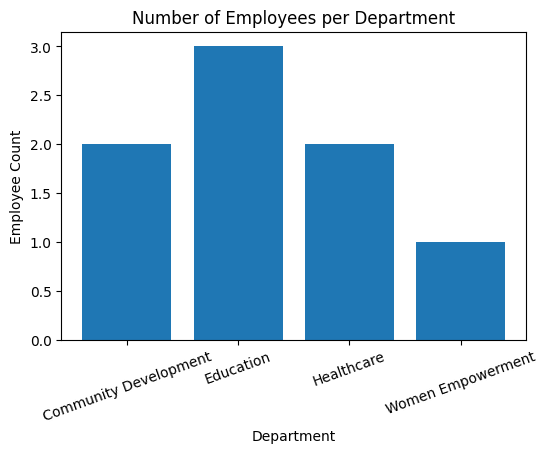

In [65]:
import matplotlib.pyplot as plt

# Run the query again
cursor.execute("""
SELECT d.DepartmentName, COUNT(e.EmployeeID) AS EmployeeCount
FROM Departments d
LEFT JOIN Employees e ON d.DepartmentID = e.DepartmentID
GROUP BY d.DepartmentName;
""")

# Fetch into pandas DataFrame
df = pd.DataFrame(cursor.fetchall(), columns=["Department", "EmployeeCount"])

# Display the DataFrame
print(df)

# Plot a bar chart
plt.figure(figsize=(6,4))
plt.bar(df["Department"], df["EmployeeCount"])
plt.title("Number of Employees per Department")
plt.xlabel("Department")
plt.ylabel("Employee Count")
plt.xticks(rotation=20)
plt.show()


-----


# Queries for **Reports**

# New section

# New section